# **INFORMACAÇÕES SOBRE O TRABALHO**

#### DUPLA

Nome: Maicon Businari    RGM:13359444 </br> 
Nome:                    RGM:

#### **OBJETIVO**

Este projeto visa tentar prever o nivel de escolaridade dos parentes com base nos dados do aluno.

Dados retirados do Kaggle:
https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

----Verificar com PEDRO----
Verificando assim que o nivel de escolaridade dos parentes influencia nas notas do estudante, pois se é possivel prever tendencias de escolaridade de parentes utilizando as notas dos aluno é porque isso provoca alguma influencia.
----Verificar com PEDRO----

# **IMPORTES**

In [106]:
from google.colab import drive
import pandas as pandas

#Pré-Processamento
from sklearn.preprocessing import StandardScaler as ss

#Treino e Teste
from sklearn.model_selection import train_test_split as tts

#Arvore de Decisão
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as dtc

#Random Forest
from sklearn.ensemble import RandomForestClassifier as rfc

#Regressão Lógica
from sklearn.linear_model import LogisticRegression as lr

#Acuracia
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **ENTRADA DE DADOS**

In [2]:
drive.mount('/content/drive', force_remount=True)

#caminho maicon
df_bruto = pandas.read_csv('/content/drive/MyDrive/Aulas/3 - Ano/2 - Semestre/Ciências de dados/2 - Bimestre/Trabalho do semestre/Performances alunos.csv', encoding='latin-1', sep=',')

Mounted at /content/drive


# **LIMPEZA DE DADOS**

In [3]:
df_bruto.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df_bruto.columns = df_bruto.columns.str.replace('gender', 'genero'
                                  ).str.replace('race/ethnicity', 'raca/etnia'
                                  ).str.replace('parental level of education', 'educacao_parental'
                                  ).str.replace('lunch', 'almoco'
                                  ).str.replace('test preparation course', 'preparacao'
                                  ).str.replace('math score', 'matematica'
                                  ).str.replace('reading score', 'portugues'
                                  ).str.replace('writing score', 'redacao')

In [6]:
'''df_bruto['genero'].unique()
df_bruto['raca/etnia'].unique()
df_bruto['educacao_parental'].unique()
df_bruto['almoco'].unique()
df_bruto['preparacao'].unique()
df_bruto['matematica'].unique()
df_bruto['portugues'].unique()
df_bruto['redacao'].unique()
'''

"df_bruto['genero'].unique()\ndf_bruto['raca/etnia'].unique()\ndf_bruto['educacao_parental'].unique()\ndf_bruto['almoco'].unique()\ndf_bruto['preparacao'].unique()\ndf_bruto['matematica'].unique()\ndf_bruto['portugues'].unique()\ndf_bruto['redacao'].unique()\n"

In [7]:
df_bruto['genero'] = df_bruto['genero'].replace('female','feminino')
df_bruto['genero'] = df_bruto['genero'].replace('male','masculino')

In [8]:
df_bruto['raca/etnia'] = df_bruto['raca/etnia'].str.replace('group A','grupo A')
df_bruto['raca/etnia'] = df_bruto['raca/etnia'].str.replace('group B','grupo B')
df_bruto['raca/etnia'] = df_bruto['raca/etnia'].str.replace('group C','grupo C')
df_bruto['raca/etnia'] = df_bruto['raca/etnia'].str.replace('group D','grupo D')
df_bruto['raca/etnia'] = df_bruto['raca/etnia'].str.replace('group E','grupo E')

In [9]:
df_bruto['educacao_parental'] = df_bruto['educacao_parental'].str.replace('some high school','ensino medio incompleto')
df_bruto['educacao_parental'] = df_bruto['educacao_parental'].str.replace('high school','ensino medio')
df_bruto['educacao_parental'] = df_bruto['educacao_parental'].str.replace('some college','superior incompleto')
df_bruto['educacao_parental'] = df_bruto['educacao_parental'].str.replace("associate's degree",'tecnologo')
df_bruto['educacao_parental'] = df_bruto['educacao_parental'].str.replace("bachelor's degree",'bacharelado')
df_bruto['educacao_parental'] = df_bruto['educacao_parental'].str.replace("master's degree",'mestrado')

In [10]:
df_bruto['almoco'] = df_bruto['almoco'].str.replace('free/reduced','gratuito/reduzido')
df_bruto['almoco'] = df_bruto['almoco'].str.replace('standard','padrao')

In [11]:
df_bruto['preparacao'] = df_bruto['preparacao'].str.replace('completed','completo')
df_bruto['preparacao'] = df_bruto['preparacao'].str.replace('none','nenhum')

In [12]:
df_bruto.head(5)

,genero,raca/etnia,educacao_parental,almoco,preparacao,matematica,portugues,redacao
0,masculino,grupo A,ensino medio,padrao,completo,67,67,63
1,feminino,grupo D,ensino medio incompleto,gratuito/reduzido,nenhum,40,59,55
2,masculino,grupo E,superior incompleto,gratuito/reduzido,nenhum,59,60,50
3,masculino,grupo B,ensino medio,padrao,nenhum,77,78,68
4,masculino,grupo E,tecnologo,padrao,completo,78,73,68


In [13]:
df_limpo = df_bruto

# **PRÉ-PROCESSAMENTO**

## Variáveis nominais -> Variáveis ordinais

In [14]:
df_limpo.head()

,genero,raca/etnia,educacao_parental,almoco,preparacao,matematica,portugues,redacao
0,masculino,grupo A,ensino medio,padrao,completo,67,67,63
1,feminino,grupo D,ensino medio incompleto,gratuito/reduzido,nenhum,40,59,55
2,masculino,grupo E,superior incompleto,gratuito/reduzido,nenhum,59,60,50
3,masculino,grupo B,ensino medio,padrao,nenhum,77,78,68
4,masculino,grupo E,tecnologo,padrao,completo,78,73,68


In [15]:
df_limpo['genero'].replace({'masculino':0, 'feminino': 1}, inplace=True)
df_limpo['raca/etnia'].replace({'grupo A':0, 'grupo B': 1, 'grupo C': 2, 'grupo D': 3, 'grupo E': 4}, inplace=True)
df_limpo['educacao_parental'].replace({'mestrado': 0,'tecnologo': 1, 'bacharelado': 2, 'ensino medio':3, 'superior incompleto': 4, 'ensino medio incompleto': 5}, inplace=True)
df_limpo['almoco'].replace({'padrao': 0, 'gratuito/reduzido':1}, inplace=True)
df_limpo['preparacao'].replace({'nenhum':0, 'completo': 1}, inplace=True)

In [83]:
df_limpo.dtypes

genero               int64
raca/etnia           int64
educacao_parental    int64
almoco               int64
preparacao           int64
matematica           int64
portugues            int64
redacao              int64
dtype: object

## **LEGENDA**

GÊNERO
  * masculino == 0; 
  * feminino == 1;

RAÇA/ETNIA
  * grupo A ==  0;
  * grupo B ==  1;
  * grupo C ==  2;
  * grupo D ==  3;
  * grupo E ==  4;

EDUCAÇÃO PARENTAL
  * mestrado == 0;
  * tecnologo == 1;
  * bacharelado == 2;
  * ensino medio == 3;
  * superios incompleto == 4;
  * ensino medio incompleto == 5;

ALMOÇO
  * padrao == 1
  * gratuito/reduzido == 0

PEPARAÇÃO
  * nenhum == 0
  * completo == 1

## **Previsores e Alvo**

In [16]:
df_limpo.head(5)

,genero,raca/etnia,educacao_parental,almoco,preparacao,matematica,portugues,redacao
0,0,0,3,0,1,67,67,63
1,1,3,5,1,0,40,59,55
2,0,4,4,1,0,59,60,50
3,0,1,3,0,0,77,78,68
4,0,4,1,0,1,78,73,68


In [17]:
previsores = df_limpo.iloc[:, 0:7].values

In [18]:
previsores

array([[ 0,  0,  3, ...,  1, 67, 67],
       [ 1,  3,  5, ...,  0, 40, 59],
       [ 0,  4,  4, ...,  0, 59, 60],
       ...,
       [ 1,  2,  5, ...,  0, 32, 35],
       [ 1,  2,  4, ...,  0, 73, 74],
       [ 0,  0,  4, ...,  1, 65, 60]])

In [19]:
previsores.shape

(1000, 7)

In [20]:
alvo = df_limpo.iloc[:, 2].values

In [21]:
alvo

array([3, 5, 4, 3, 1, 3, 2, 4, 3, 4, 4, 3, 1, 3, 5, 1, 3, 1, 1, 4, 1, 1,
       4, 4, 5, 3, 5, 3, 3, 5, 4, 2, 5, 1, 2, 2, 4, 3, 4, 1, 0, 3, 3, 0,
       3, 2, 1, 5, 3, 1, 3, 5, 1, 3, 3, 4, 2, 1, 4, 5, 4, 5, 5, 2, 0, 5,
       3, 5, 3, 3, 1, 1, 4, 5, 0, 3, 4, 3, 1, 5, 2, 5, 1, 3, 1, 5, 4, 4,
       4, 3, 4, 5, 0, 2, 0, 3, 1, 3, 4, 1, 4, 4, 3, 3, 4, 2, 3, 2, 1, 4,
       4, 5, 0, 2, 3, 1, 4, 1, 2, 5, 3, 2, 2, 5, 1, 0, 1, 5, 4, 1, 1, 3,
       4, 1, 4, 5, 4, 1, 4, 5, 1, 4, 2, 1, 0, 3, 5, 4, 2, 1, 4, 3, 1, 2,
       1, 4, 3, 1, 1, 5, 1, 1, 2, 5, 2, 2, 2, 5, 0, 3, 3, 4, 4, 5, 4, 4,
       2, 5, 4, 3, 5, 4, 2, 1, 1, 0, 3, 5, 3, 5, 5, 5, 5, 1, 2, 5, 2, 0,
       1, 3, 1, 1, 4, 5, 1, 5, 0, 4, 4, 1, 3, 1, 4, 5, 5, 2, 1, 4, 3, 1,
       4, 1, 5, 0, 2, 5, 4, 2, 3, 1, 3, 4, 4, 4, 2, 1, 2, 3, 1, 2, 4, 1,
       5, 4, 5, 3, 5, 5, 1, 1, 4, 5, 5, 1, 3, 5, 2, 5, 5, 1, 5, 3, 5, 1,
       5, 5, 1, 1, 4, 4, 5, 5, 3, 3, 5, 5, 3, 1, 3, 3, 5, 1, 4, 4, 2, 1,
       3, 4, 5, 3, 1, 3, 4, 3, 2, 5, 5, 2, 3, 3, 4,

In [22]:
alvo.shape

(1000,)

## **Escalonamento**

In [23]:
df_limpo.describe()

,genero,raca/etnia,educacao_parental,almoco,preparacao,matematica,portugues,redacao
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.483000,2.161000,2.876000,0.348000,0.335000,66.396000,69.002000,67.738000
std,0.499961,1.132414,1.589702,0.476574,0.472227,15.402871,14.737272,15.600985
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,27.000000,23.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,56.000000,60.000000,58.000000
50%,0.000000,2.000000,3.000000,0.000000,0.000000,66.500000,70.000000,68.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.000000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.000000,100.000000,100.000000


In [24]:
previsores_escalonados = ss().fit_transform(previsores)
previsores_escalonados

array([[-0.96655883, -1.90926764,  0.07804109, ...,  1.40892676,
         0.03923309, -0.13591401],
       [ 1.03459817,  0.74126587,  1.33676836, ..., -0.7097601 ,
        -1.714564  , -0.67902695],
       [-0.96655883,  1.62477704,  0.70740473, ..., -0.7097601 ,
        -0.48041049, -0.61113783],
       ...,
       [ 1.03459817, -0.1422453 ,  1.33676836, ..., -0.7097601 ,
        -2.23420758, -2.30836575],
       [ 1.03459817, -0.1422453 ,  0.70740473, ..., -0.7097601 ,
         0.42896578,  0.33930981],
       [-0.96655883, -1.90926764,  0.70740473, ...,  1.40892676,
        -0.0906778 , -0.61113783]])

In [25]:
previsores_df = pandas.DataFrame(previsores_escalonados)
previsores_df

,0,1,2,3,4,5,6
0,-0.966559,-1.909268,0.078041,-0.730577,1.408927,0.039233,-0.135914
1,1.034598,0.741266,1.336768,1.368782,-0.709760,-1.714564,-0.679027
2,-0.966559,1.624777,0.707405,1.368782,-0.709760,-0.480410,-0.611138
3,-0.966559,-1.025756,0.078041,-0.730577,-0.709760,0.688788,0.610866
4,-0.966559,1.624777,-1.180686,-0.730577,1.408927,0.753743,0.271421
...,...,...,...,...,...,...,...
995,-0.966559,-0.142245,0.078041,-0.730577,-0.709760,0.428966,0.067753
996,-0.966559,0.741266,-1.180686,1.368782,1.408927,1.208431,1.493425
997,1.034598,-0.142245,1.336768,1.368782,-0.709760,-2.234208,-2.308366
998,1.034598,-0.142245,0.707405,-0.730577,-0.709760,0.428966,0.339310


## **Treino e Teste**

In [26]:
x_treino, x_teste, y_treino, y_teste = tts(previsores_escalonados, alvo, test_size = 0.3, random_state = 0)

In [27]:
x_treino.shape

(700, 7)

In [28]:
x_teste.shape

(300, 7)

In [29]:
y_treino.shape

(700,)

In [30]:
y_teste.shape

(300,)

## **Resumo Pré-Processamento**

alvo = Nivel de educação parental. </br>
previsores = Dados do aluno desde alimentação até notas escolares transformados em numeros de forma manual, não escalodado.</br>
previsores_escalonados = Dados do aluno desde alimentação até notas escolares em forma numérica, escalodado.



# **ARVORE DE DECISÃO**

In [70]:
arvore_decisao = dtc(criterion='entropy', random_state = 0, max_depth = 2)
_arvore_decisao = arvore_decisao.fit(x_treino, y_treino)

[Text(0.5, 0.8333333333333334, 'X[2] <= 0.393\nentropy = 2.48\nsamples = 700\nvalue = [51, 148, 65, 140, 152, 144]'),
 Text(0.25, 0.5, 'X[2] <= -0.866\nentropy = 1.862\nsamples = 404\nvalue = [51, 148, 65, 140, 0, 0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.821\nsamples = 199\nvalue = [51, 148, 0, 0, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.901\nsamples = 205\nvalue = [0, 0, 65, 140, 0, 0]'),
 Text(0.75, 0.5, 'X[2] <= 1.022\nentropy = 0.999\nsamples = 296\nvalue = [0, 0, 0, 0, 152, 144]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 152\nvalue = [0, 0, 0, 0, 152, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 144\nvalue = [0, 0, 0, 0, 0, 144]')]

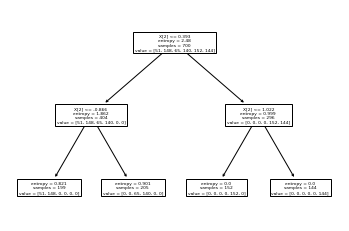

In [71]:
tree.plot_tree(_arvore_decisao)

#### **Dados de Teste -> Arvore de Decisão**

In [ ]:
previsores_arvore_decisao_teste = arvore_decisao.predict(x_teste)

In [74]:
print("Acurácia: %.2f%%" %(accuracy_score(y_teste, previsores_arvore_decisao_teste)*100.0))

Acurácia: 78.00%


In [76]:
print(classification_report(y_teste, previsores_arvore_decisao_teste))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.74      1.00      0.85        55
           2       0.00      0.00      0.00        47
           3       0.57      1.00      0.73        62
           4       1.00      1.00      1.00        70
           5       1.00      1.00      1.00        47

    accuracy                           0.78       300
   macro avg       0.55      0.67      0.60       300
weighted avg       0.64      0.78      0.70       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **Dados de Treino -> Arvore de Decisão**

In [ ]:
previsores_arvore_decisao_treino = arvore_decisao.predict(x_treino)
previsores_arvore_decisao_treino

In [82]:
print("Acurácia: %.2f%%" %(accuracy_score(y_treino, previsores_arvore_decisao_treino)*100.0))

Acurácia: 83.43%


#### **Resultados obtidos -> Arvore de Decisão**

Acurácia da previsão escalonada de:</br> 
Treino = 78% </br>
Teste = 83,43% </br>

Utilizado ARVORE DE DECISSÕES com as seguintes regras:</br> 
max_depth = 3;</br> 
random_state = 0;</br> 
criterion = entropy;</br> 

# **RANDOM FORESTS**

In [95]:
random_forest = rfc(n_estimators = 150, criterion='entropy', random_state = 0, max_depth = 5)
_random_forest = random_forest.fit(x_treino, y_treino)

#### **Dados de Teste -> Random Forests**

In [96]:
previsoes_random_forest_teste = _random_forest.predict(x_teste)

In [104]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random_forest_teste) * 100.0))

Acurácia: 92.33%


In [ ]:
print(classification_report(y_teste, previsoes_random_forest_teste))

#### **Dados de Treino -> Random Forest**

In [100]:
previsoes_random_forest_treino = _random_forest.predict(x_treino)

In [103]:
print("Acurácia: %.2f%%" % (accuracy_score(y_treino, previsoes_random_forest_treino)*100))

Acurácia: 95.29%


#### **Resultados obtidos -> Random Forests**

Acurácia da previsão escalonada de:</br>
Treino = 92,33% </br>
Teste = 95,29% </br>

Utilizado RANDOM FORESTS com as seguintes regras:</br> 
max_depth = 5</br>
n_estimators = 150</br>
random_state = 0;</br> 
criterion= entropy;</br> 

# **REGRESSÃO LÓGICA**

In [227]:
logistica_regressao = lr(random_state=0, max_iter=100, penalty="l2", tol=0.00001, C=1, solver="lbfgs")
_logistica_regressao = logistica_regressao.fit(x_treino, y_treino)

In [ ]:
_logistica_regressao.intercept_

In [ ]:
_logistica_regressao.coef_

#### **Dados de Teste -> Regressão Lógica**

In [230]:
previsoes_logistica_regressao_teste = _logistica_regressao.predict(x_teste)

In [ ]:
print("Acurácia: %.2f%%" %(accuracy_score(y_teste, previsoes_logistica_regressao_teste) * 100.0))

In [ ]:
print(classification_report(y_teste, previsoes_logistica_regressao_teste))

#### **Dados de Treino -> Regressão Lógica**

In [233]:
previsoes_logistica_regressao_treino = _logistica_regressao.predict(x_treino)

In [ ]:
print("Acurácia: %.2f%%" %(accuracy_score(y_treino, previsoes_logistica_regressao_treino) * 100.0))

#### **Resultados obtidos -> Regressão Lógica**

Acurácia da previsão escalonada de:</br>
C1</br>
Treino = 92,33% </br>
Teste = 97,43% </br>

C2</br>
Treino = 98,33% </br>
Teste = 99,57% </br>

C3</br>
Treino = 100% </br>
Teste = 100% </br>

Utilizado REGRESSÃO LÓGICA com as seguintes regras:</br> 
peality = l2;</br>
tol = 0.00001</br>
max_iter = 100</br>
solver = lbfgs;</br>
random_state = 0;</br> 